In [1]:
# Importing the required packages.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
import warnings
%matplotlib inline

In [2]:
# Loading dataset
# Combining 2 csv files
wine_red = pd.read_csv(r'winequality-red.csv', delimiter = ';')
wine_white = pd.read_csv(r'winequality-white.csv', delimiter = ';')
wine = pd.concat([wine_red, wine_white.iloc[:1000, :]], axis = 0)
wine = wine.sample(frac = 1, random_state=42)
wine.reset_index(drop=True, inplace=True)

In [3]:
# Checking how the data is distributed
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.8,0.62,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1,7.3,0.58,0.30,2.4,0.074,15.0,55.0,0.99680,3.46,0.59,10.2,5
2,8.2,1.00,0.09,2.3,0.065,7.0,37.0,0.99685,3.32,0.55,9.0,6
3,7.2,0.31,0.46,5.0,0.040,3.0,29.0,0.99060,3.04,0.53,12.5,4
4,5.8,0.61,0.11,1.8,0.066,18.0,28.0,0.99483,3.55,0.66,10.9,6


Understanding the wine data columns
1. fixed acidity :
most acids involved with wine or fixed or nonvolatile (do not evaporate readily)

2. volatile acidity :
the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste

3. citric acid :
found in small quantities, citric acid can add ‘freshness’ and flavor to wines

4. residual sugar :
the amount of sugar remaining after fermentation stops, it’s rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet

5. chlorides :
the amount of salt in the wine

6. free sulfur dioxide :
the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisul-fite ion; it prevents microbial growth and the oxidation of wine

7. total sulfur dioxide :
amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine

8. density :
the density of water is close to that of water depending on the percent alcohol and sugar con-tent

9. pH :
describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3–4 on the pH scale

10. sulphates :
a wine additive which can contribute to sulfur dioxide gas (S02) levels, which acts as an antimicrobial and antioxidant

11. alcohol :
the percent alcohol content of the wine

12. quality :
output variable (based on sensory data, score between 0 and 10)

In [4]:
# shape of data

wine.shape

(2599, 12)

In [5]:
#Information about the data columns
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2599 entries, 0 to 2598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         2599 non-null   float64
 1   volatile acidity      2599 non-null   float64
 2   citric acid           2599 non-null   float64
 3   residual sugar        2599 non-null   float64
 4   chlorides             2599 non-null   float64
 5   free sulfur dioxide   2599 non-null   float64
 6   total sulfur dioxide  2599 non-null   float64
 7   density               2599 non-null   float64
 8   pH                    2599 non-null   float64
 9   sulphates             2599 non-null   float64
 10  alcohol               2599 non-null   float64
 11  quality               2599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 243.8 KB


In [6]:
# summary stat

wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,2599.000000,2599.000000,2599.000000,2599.000000,2599.000000,2599.000000,2599.000000,2599.000000,2599.000000,2599.000000,2599.000000,2599.000000
mean,7.753751,0.433759,0.296822,4.080569,0.071948,23.662178,84.429396,0.995881,3.272289,0.595533,10.318411,5.724125
std,1.613568,0.193844,0.176031,3.909254,0.044337,16.562481,61.151983,0.002508,0.160119,0.169329,1.079672,0.864846
min,4.600000,0.080000,0.000000,0.800000,0.012000,1.000000,6.000000,0.988600,2.740000,0.270000,8.400000,3.000000
25%,6.700000,0.280000,0.180000,1.900000,0.047000,10.000000,31.000000,0.994200,3.160000,0.490000,9.500000,5.000000
50%,7.300000,0.400000,0.300000,2.300000,0.068000,20.000000,68.000000,0.996200,3.270000,0.570000,10.000000,6.000000
75%,8.400000,0.580000,0.410000,4.500000,0.083000,34.000000,132.500000,0.997600,3.380000,0.670000,11.000000,6.000000
max,15.900000,1.580000,1.660000,22.000000,0.611000,131.000000,313.000000,1.003690,4.010000,2.000000,14.900000,9.000000


the count of each feature is the same which describes the absense of any missing values.

there is a larger gap between the 75th percentile and max for features like residual sugar, free sulfur dioxide & total sulfur dioxide

on an average the quality of wine is found to be 5.72 and the average alcohol content in wine is 10.31

almost negligible variation is found in density

In [7]:
#Again checking for missing values

wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

we do not observe the presence of missing values in the data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


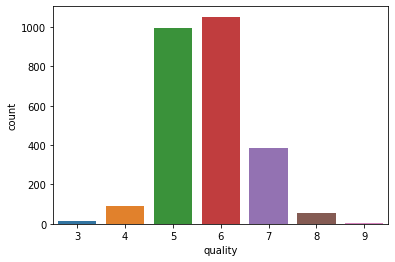

In [8]:
#plotting count vs quality
sns.countplot(wine['quality'])
warnings.filterwarnings("ignore")
plt.show()

In [9]:
wine['quality'].value_counts()

6    1053
5     996
7     385
4      90
8      55
3      16
9       4
Name: quality, dtype: int64

<Figure size 432x288 with 0 Axes>

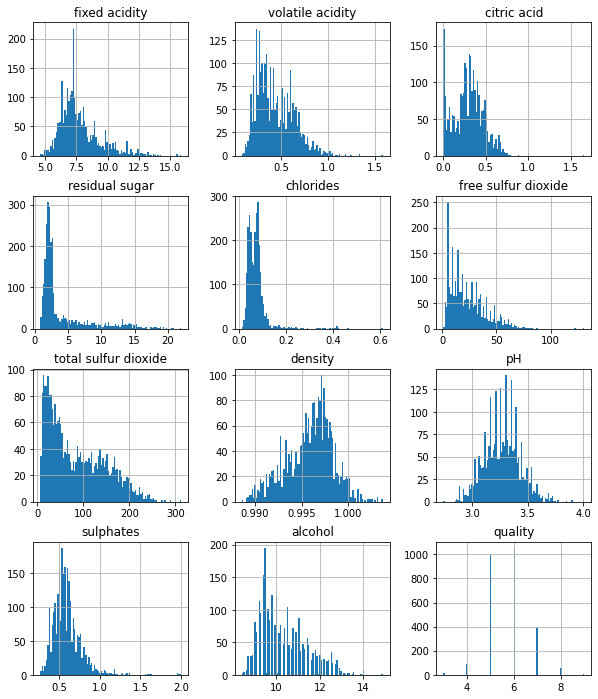

In [10]:
plt.tight_layout()
wine.hist(bins = 100, figsize = (10,12))
plt.show()

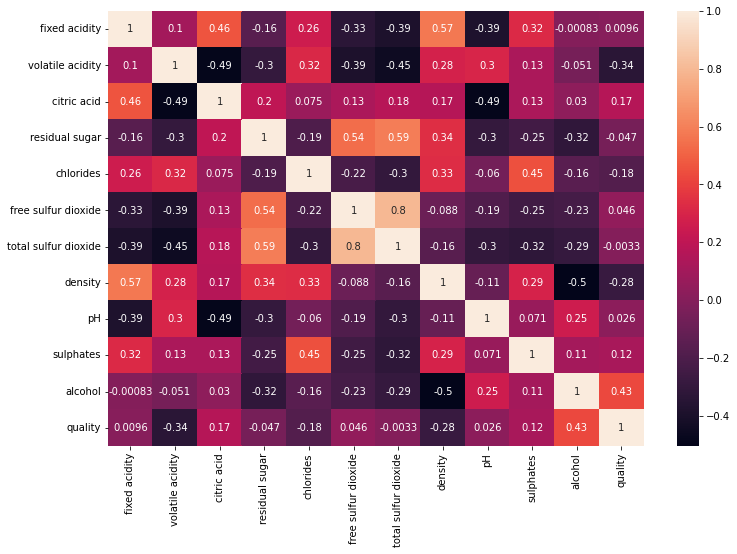

In [11]:
plt.figure(figsize = (12,8))
sns.heatmap(wine.corr(), annot = True)
plt.show()

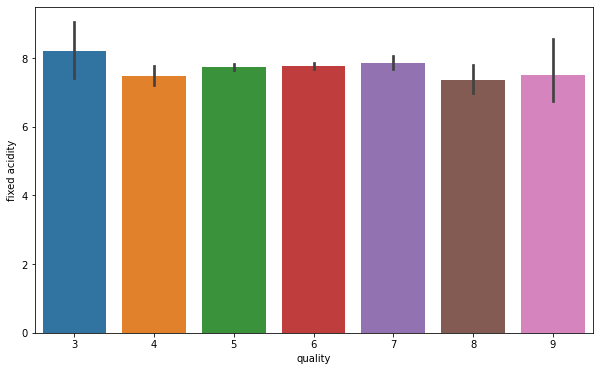

In [12]:
#Now we check how each attribute changes wrt to quality

#lets begin with Fixed Acidity
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = wine)

In [13]:
#Here we see that fixed acidity does not give any specification to classify the quality.

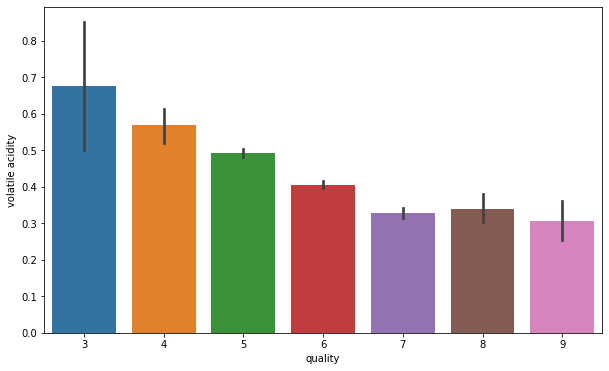

In [14]:
#Now lets check Volatile Acidity
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine)

In [15]:
#Here we see that its quite a decreasing trend in the volatile acidity as we go higher the quality 

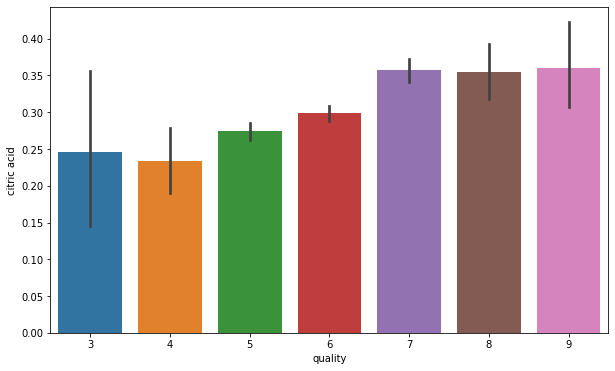

In [16]:
#Citric Acid vs Quality
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = wine)

In [17]:
#Composition of citric acid go higher as we go higher in the quality of the wine

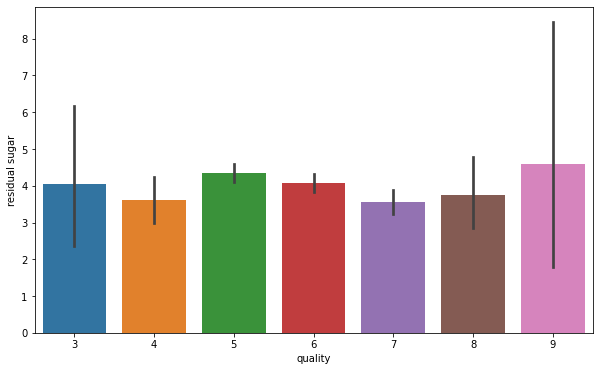

In [18]:
# Residual Sugar vs Quality
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = wine)

In [19]:
#Here we see that residual sugar does not give any specification to classify the quality.

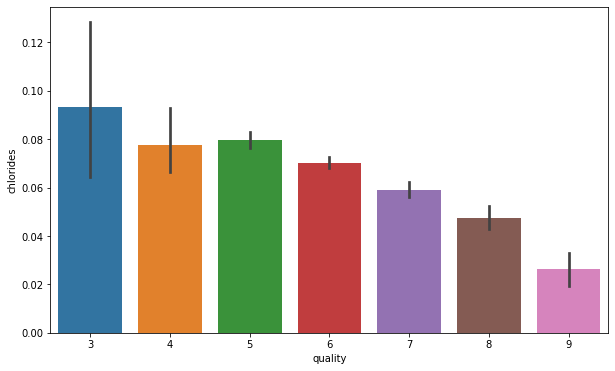

In [20]:
# Chloride vs Quality
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = wine)

In [21]:
#Composition of chloride also go down as we go higher in the quality of the wine

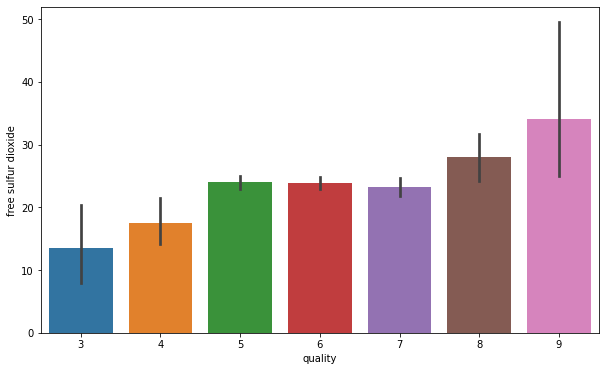

In [22]:
# Free Sulphur Chloride vs Quality
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = wine)

In [23]:
# Free sulphur chloride kind off increases with quality

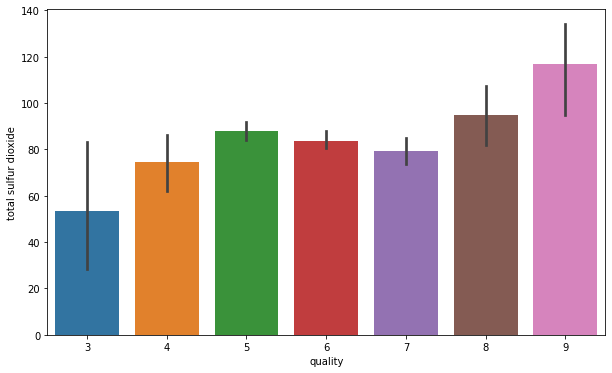

In [24]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = wine)

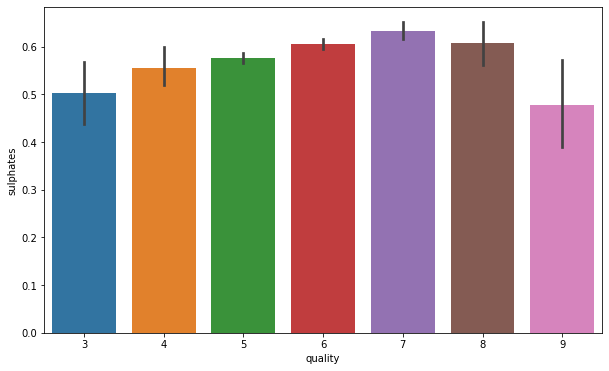

In [25]:
#Sulphates level goes higher with the quality of wine but drops later
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = wine)

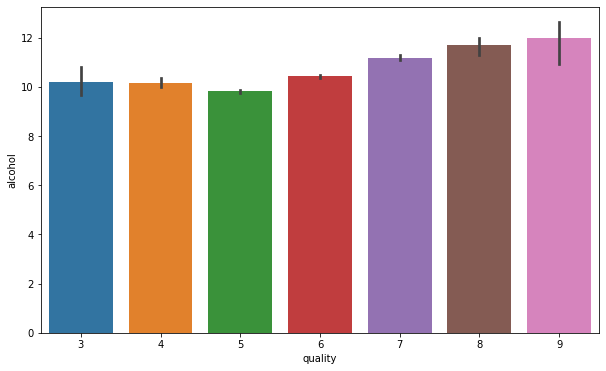

In [26]:
#Alcohol level also goes higher as the quality of wine increases
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = wine)

In [27]:
#Making binary classificaion for the response variable.
#Dividing wine as good and bad by giving the limit for the quality
#0 to 6 are bad quality wines
#6 to 9 are good ones
bins = (0, 6, 9)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)

#Now lets assign a label to our quality variable
label_quality = LabelEncoder()

#Bad becomes 0 and good becomes 1 
wine['quality'] = label_quality.fit_transform(wine['quality'])
wine['quality'].value_counts()

0    2155
1     444
Name: quality, dtype: int64

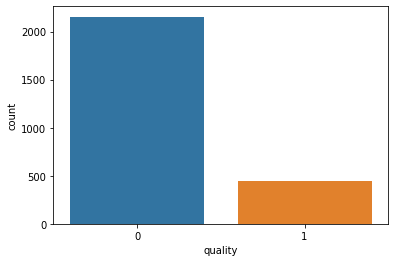

In [28]:
sns.countplot(wine['quality'])
warnings.filterwarnings("ignore")

In [29]:
#Now seperate the dataset as response variable and feature variabLes
X = wine.drop('quality', axis = 1)
y = wine['quality']

In [30]:
#Train and Test splitting of data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [31]:
#Applying Standard scaling to get optimized result
sc = StandardScaler()

In [32]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Our training and testing data is ready now to perform machine learning algorithm

#### Random Forest Classifier

In [33]:
rfc = RandomForestClassifier(n_estimators=500)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [34]:
#Let's see how our model performed
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       431
           1       0.77      0.56      0.65        89

    accuracy                           0.90       520
   macro avg       0.84      0.76      0.79       520
weighted avg       0.89      0.90      0.89       520



#### Random forest gives the accuracy of 90%

In [35]:
#Confusion matrix for the random forest classification
print(confusion_matrix(y_test, pred_rfc))

[[416  15]
 [ 39  50]]


####Stochastic Gradient Descent Classifier (SGDC)

In [36]:
sgd = SGDClassifier(penalty=None)
sgd.fit(X_train, y_train)
pred_sgd = sgd.predict(X_test)

In [37]:
print(classification_report(y_test, pred_sgd))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       431
           1       0.61      0.30      0.41        89

    accuracy                           0.85       520
   macro avg       0.74      0.63      0.66       520
weighted avg       0.83      0.85      0.83       520



#### 85% accuracy using stochastic gradient descent classifier

In [38]:
print(confusion_matrix(y_test, pred_sgd))

[[414  17]
 [ 62  27]]


#### Support Vector Classifier (SVC)

In [39]:
svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

In [40]:
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       431
           1       0.64      0.30      0.41        89

    accuracy                           0.85       520
   macro avg       0.76      0.63      0.66       520
weighted avg       0.83      0.85      0.83       520



#### Support vector classifier gets 85%

### Let's try to increase our accuracy of models
#### Grid Search CV

In [41]:
#Finding best parameters for our SVC model
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10, n_jobs = 1)

In [42]:
grid_svc.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(), n_jobs=1,
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [43]:
#Best parameters for our svc model
grid_svc.best_params_

{'C': 1.2, 'gamma': 1.2, 'kernel': 'rbf'}

In [44]:
#Let's run our SVC again with the best parameters.
svc2 = SVC(C = 1.2, gamma =  0.9, kernel= 'rbf')
svc2.fit(X_train, y_train)
pred_svc2 = svc2.predict(X_test)
print(classification_report(y_test, pred_svc2))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       431
           1       0.88      0.47      0.61        89

    accuracy                           0.90       520
   macro avg       0.89      0.73      0.78       520
weighted avg       0.90      0.90      0.89       520



#### SVC improves from 85% to 90% using Grid Search CV

### Cross Validation Score for Random Forest and Stochastic Gradient Descent

In [45]:
#Now lets try to do some evaluation for random forest model using cross validation.
rfc_eval = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 10)
rfc_eval.mean()

0.8922496283909329

### Random forest accuracy slightly increases from 89% to 89.22 % using cross validation score

### THANK YOU